# 11.4. The Stedelijk Museum Amsterdam problem

Python code for the Sedelijk Museum Amsterdam design problem ([Chapter 9.3](https://teachbooks.github.io/systems-engineering-design/main/chapters/chapter_9_3.html)).
Python code for the shopping mall design problem revisited non-linear example ([Chapter 7.2](https://teachbooks.github.io/systems-engineering-design/main/chapters/chapter_7_2.html)).

```{note}
Press the rocket symbol on the top right of the page to make the page interactive and play with the code! 
``` 

## Import Packages

This script is fairly similar to the non-linear shopping mall example. Only the preference functions for objective 1 and
 2 are changed, together with the weights.

Note that the non-linear preference curves are created by using an interpolation function called `pchip_interpolation`.

In [12]:
# ==== SAFE MATPLOTLIB BOOTSTRAP (run this cell first) ====
import os, sys, importlib

# 1) Verwijder of guard alle micropip code: jullie draaien geen Pyodide
# (Als je ooit Pyodide wilt ondersteunen, wrap dan micropip in try/except + runtime check.)

def _in_ipython_kernel():
    try:
        from IPython import get_ipython
        ip = get_ipython()
        return bool(ip) and hasattr(ip, "kernel")
    except Exception:
        return False

# 2) Kies een veilig backend VOORDAT we pyplot importeren
import matplotlib
_backend_set = False

if _in_ipython_kernel():
    # Probeer echte inline backend
    try:
        importlib.import_module("matplotlib_inline.backend_inline")
        matplotlib.use("module://matplotlib_inline.backend_inline", force=True)
        _backend_set = True
    except Exception as e:
        print("[warn] inline backend niet beschikbaar/compatibel:", e)

if not _backend_set:
    # Val terug op Agg (headless, maar stabiel)
    try:
        matplotlib.use("Agg", force=True)
        print("[info] Using Agg backend (no GUI).")
    except Exception as e:
        print("[warn] Agg backend kon niet gezet worden:", e)

# 3) Nu MAG pyplot pas worden geïmporteerd
import matplotlib.pyplot as plt

# 4) Laat plt.show() toch inline werken als we op Agg zitten
try:
    from IPython.display import display, Image
    def _safe_show():
        import uuid
        fname = f"_plot_{uuid.uuid4().hex}.png"
        plt.savefig(fname, bbox_inches="tight")
        display(Image(filename=fname))
        plt.close('all')
    if matplotlib.get_backend().lower() == "agg":
        plt.show = _safe_show
except Exception:
    # Geen IPython: show doet dan niets (is ok in scripts)
    pass

# 5) Optionele, prettige defaults
import matplotlib as mpl
mpl.rcParams.update({
    "figure.dpi": 100,
    "savefig.dpi": 120,
    "figure.figsize": (10, 5),
})

# 6) Jullie overige imports kunnen nu veilig
import sys
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import pchip_interpolate

from genetic_algorithm_pfm import GeneticAlgorithm

## Set Weights for Different Objectives

Set weights for the different objectives.

In [13]:
# set weights for the different objectives
w1 = .5
w2 = 1/24
w3 = 1/24
w4 = 1/24
w5 = 1/24
w6 = 1/24
w7 = 1/24
w8 = 1/24
w9 = 1/24
w10 = 1/24
w11 = 1/24
w12 = 1/24
w13 = 1/24

def objective_p1(p1, p2, s1, p3, s2, p4, s3, p5, s4, p6, p7, s5):
    """
    Objective to minimize the investment.
    """

    return pchip_interpolate([70, 71, 74], [100, 70, 0], -((2580-2950) * 14142 + 2950 * (p1 + p2 + p3 + p4 + p5 + p6 + p7) * 100 + 1400 * (s1 + s2 + s3 + s4 +s5) * 100))

def objective_p2(p1, p2, s1, p3, s2, p4, s3, p5, s4, p6, p7, s5):
    """
    Objective to maximize p1.
    """
    
    return pchip_interpolate([79.01, 97.03, 101.54], [0, 20, 100], p1)

def objective_p3(p1, p2, s1, p3, s2, p4, s3, p5, s4, p6, p7, s5):
    """
    Objective to maximize p2.
    """
    
    return pchip_interpolate([13.54, 13.75, 14.38], [0, 70, 100], p2)

def objective_p4(p1, p2, s1, p3, s2, p4, s3, p5, s4, p6, p7, s5):
    """
    Objective to maximize s1.
    """
    
    return pchip_interpolate([6.93, 6.97, 7.14], [0, 80, 100], s1)

def objective_p5(p1, p2, s1, p3, s2, p4, s3, p5, s4, p6, p7, s5):
    """
    Objective to maximize p3.
    """
    
    return pchip_interpolate([9.41, 10.50, 13.78], [0, 70, 100], p3)

def objective_p6(p1, p2, s1, p3, s2, p4, s3, p5, s4, p6, p7, s5):
    """
    Objective to maximize s2.
    """
    
    return pchip_interpolate([.56, .62, .84], [0, 80, 100], s2)

def objective_p7(p1, p2, s1, p3, s2, p4, s3, p5, s4, p6, p7, s5):
    """
    Objective to maximize p4.
    """
    
    return pchip_interpolate([5.25, 6.52, 7.21], [0, 35, 100], p4)

def objective_p8(p1, p2, s1, p3, s2, p4, s3, p5, s4, p6, p7, s5):
    """
    Objective to maximize s3.
    """
    
    return pchip_interpolate([74.23, 79.30, 99.60], [0, 80, 100], s3)

def objective_p9(p1, p2, s1, p3, s2, p4, s3, p5, s4, p6, p7, s5):
    """
    Objective to maximize p5.
    """
    
    return pchip_interpolate([62.64, 64.17, 70.31], [0, 80, 100], p5)

def objective_p10(p1, p2, s1, p3, s2, p4, s3, p5, s4, p6, p7, s5):
    """
    Objective to maximize s4.
    """
    
    return pchip_interpolate([12.07, 12.95, 16.48], [0, 80, 100], s4)

def objective_p11(p1, p2, s1, p3, s2, p4, s3, p5, s4, p6, p7, s5):
    """
    Objective to maximize p6.
    """
    
    return pchip_interpolate([31.67, 37.02, 39.90], [0, 35, 100], p6)

def objective_p12(p1, p2, s1, p3, s2, p4, s3, p5, s4, p6, p7, s5):
    """
    Objective to maximize p7.
    """
    
    return pchip_interpolate([16.24, 17.76, 22.30], [0, 70, 100], p7)

def objective_p13(p1, p2, s1, p3, s2, p4, s3, p5, s4, p6, p7, s5):
    """
    Objective to maximize s5.
    """
    
    return pchip_interpolate([1.68, 1.91, 2.81], [0, 80, 100], s5)


def objective(variables):
    """
    Objective function that is fed to the GA. Calles the separate preference functions that are declared above.

    :param variables: array with design variable values per member of the population. Can be split by using array
    slicing
    :return: 1D-array with aggregated preference scores for the members of the population.
    """
    # extract 1D design variable arrays from full 'variables' array
    p1 = variables[:, 0]
    p2 = variables[:, 1]
    s1 = variables[:, 2]
    p3 = variables[:, 3]
    s2 = variables[:, 4]
    p4 = variables[:, 5]
    s3 = variables[:, 6]
    p5 = variables[:, 7]
    s4 = variables[:, 8]
    p6 = variables[:, 9]
    p7 = variables[:, 1]
    s5 = variables[:, 11]

    # calculate the preference scores
    p_1 = objective_p1(p1, p2, s1, p3, s2, p4, s3, p5, s4, p6, p7, s5)
    p_2 = objective_p2(p1, p2, s1, p3, s2, p4, s3, p5, s4, p6, p7, s5)
    p_3 = objective_p3(p1, p2, s1, p3, s2, p4, s3, p5, s4, p6, p7, s5)
    p_4 = objective_p4(p1, p2, s1, p3, s2, p4, s3, p5, s4, p6, p7, s5)
    p_5 = objective_p5(p1, p2, s1, p3, s2, p4, s3, p5, s4, p6, p7, s5)
    p_6 = objective_p6(p1, p2, s1, p3, s2, p4, s3, p5, s4, p6, p7, s5)
    p_7 = objective_p7(p1, p2, s1, p3, s2, p4, s3, p5, s4, p6, p7, s5)
    p_8 = objective_p8(p1, p2, s1, p3, s2, p4, s3, p5, s4, p6, p7, s5)
    p_9 = objective_p9(p1, p2, s1, p3, s2, p4, s3, p5, s4, p6, p7, s5)
    p_10 = objective_p10(p1, p2, s1, p3, s2, p4, s3, p5, s4, p6, p7, s5)
    p_11 = objective_p11(p1, p2, s1, p3, s2, p4, s3, p5, s4, p6, p7, s5)
    p_12 = objective_p12(p1, p2, s1, p3, s2, p4, s3, p5, s4, p6, p7, s5)
    p_13 = objective_p13(p1, p2, s1, p3, s2, p4, s3, p5, s4, p6, p7, s5)

    # aggregate preference scores and return this to the GA
    return [w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, w12, w13], [p_1, p_2, p_3, p_4, p_5, p_6, p_7, p_8, p_9, p_10, p_11, p_12, p_13]


## Define Constraints and Bounds

Before we can run the optimization, we finally need to define the constraints and bounds.

In [14]:
def constraint_1(variables):
    """Constraint that checks if the sum of the areas x1 and x2 is not lower than 3,000 m2.

    :param variables: ndarray of n-by-m, with n the population size of the GA and m the number of variables.
    :return: list with scores of the constraint
    """
    
    p1 = variables[:, 0]
    p2 = variables[:, 1]
    s1 = variables[:, 2]
    p3 = variables[:, 3]
    s2 = variables[:, 4]
    p4 = variables[:, 5]
    s3 = variables[:, 6]
    p5 = variables[:, 7]
    s4 = variables[:, 8]
    p6 = variables[:, 9]
    p7 = variables[:, 1]
    s5 = variables[:, 11]

    return (p1 + p2 + p3 + p4 + p5 + p6 + p7) * 100 - (14142 + 24007)  # < 0

def constraint_2(variables):
    """Constraint that checks if the sum of the areas x1 and x2 is not lower than 3,000 m2.

    :param variables: ndarray of n-by-m, with n the population size of the GA and m the number of variables.
    :return: list with scores of the constraint
    """
    
    p1 = variables[:, 0]
    p2 = variables[:, 1]
    s1 = variables[:, 2]
    p3 = variables[:, 3]
    s2 = variables[:, 4]
    p4 = variables[:, 5]
    s3 = variables[:, 6]
    p5 = variables[:, 7]
    s4 = variables[:, 8]
    p6 = variables[:, 9]
    p7 = variables[:, 1]
    s5 = variables[:, 11]

    return (s1 + s2 + s3 + s4 + s5) * 100 - 13000  # < 0

def constraint_3(variables):
    """Constraint to ensure the existing building on the central location is completely used

    :param variables: ndarray of n-by-m, with n the population size of the GA and m the number of variables.
    :return: list with scores of the constraint
    """
    
    p1 = variables[:, 0]
    p2 = variables[:, 1]
    s1 = variables[:, 2]
    p3 = variables[:, 3]
    s2 = variables[:, 4]
    p4 = variables[:, 5]
    s3 = variables[:, 6]
    p5 = variables[:, 7]
    s4 = variables[:, 8]
    p6 = variables[:, 9]
    p7 = variables[:, 1]
    s5 = variables[:, 11]

    return ((2580-2950) * 14142 + 2950 * (p1 + p2 + p3 + p4 + p5 + p6 + p7) * 100 + 1400 * (s1 + s2 + s3 + s4 +s5) * 100) - 74 * 1000000 # < 0

# define list with constraints
cons = [['ineq', constraint_1], ['ineq', constraint_2], ['ineq', constraint_3]]

# set bounds for all variables
b1 = [79.01, 101.54] # p1
b2 = [13.54, 14.38]  # p2
b3 = [6.93, 7.14]    # s1
b4 = [9.41, 13.78]   # p3
b5 = [.56, .84]      # s2
b6 = [5.25, 7.21]    # p4
b7 = [74.23, 99.60]  # s3
b8 = [62.64, 70.31]  # p5
b9 = [12.07, 16.48] # s4
b10 = [31.67, 39.90] # p6
b11 = [16.24, 22.30] # p7
b12 = [1.68, 2.81]   # s5

bounds = [b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11, b12]

## Graphical Output

Setup the graphical output.

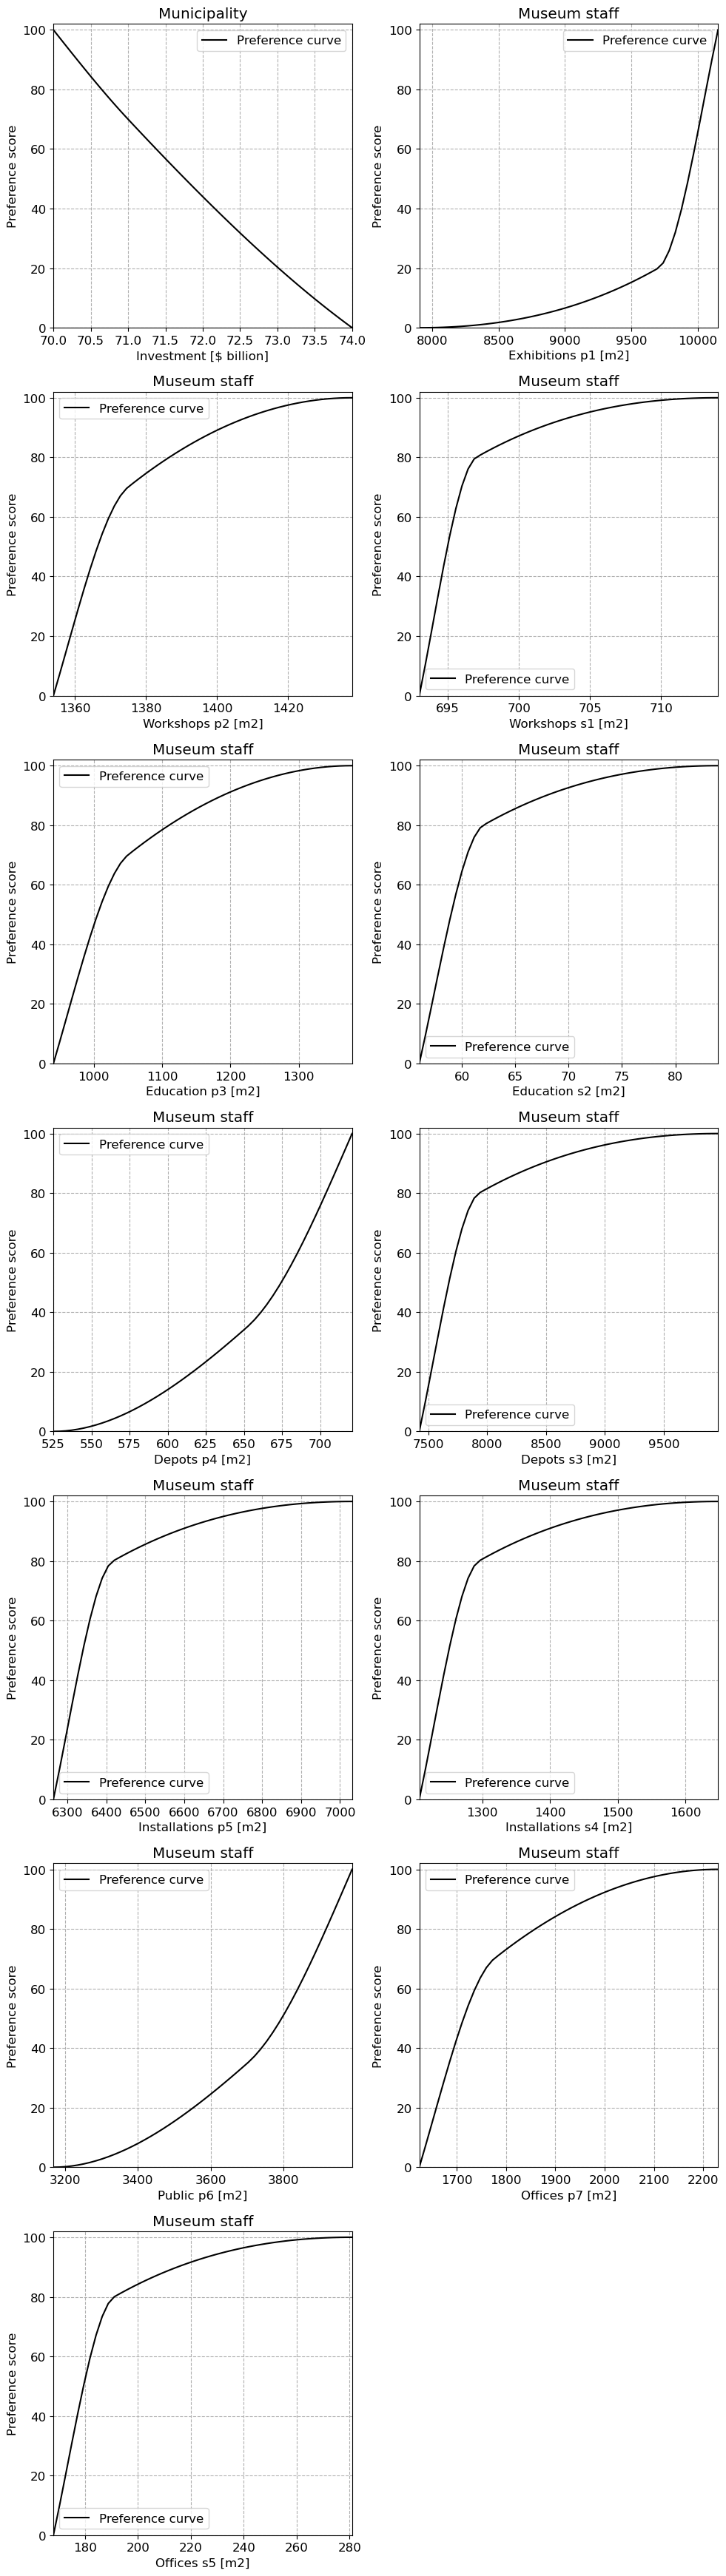

In [15]:
# create arrays for plotting continuous preference curves
c1 = np.linspace(70, 74)
c2 = np.linspace(7901, 10154)
c3 = np.linspace(1354, 1438)
c4 = np.linspace(693,714)
c5 = np.linspace(941, 1378)
c6 = np.linspace(56, 84)
c7 = np.linspace(525, 721)
c8 = np.linspace(7423,9960)
c9 = np.linspace(6264, 7031)
c10 = np.linspace(1207, 1648)
c11 = np.linspace(3167, 3990)
c12 = np.linspace(1624,2230)
c13 = np.linspace(168,281)

# calculate the preference functions
p1 = pchip_interpolate([70, 71, 74], [100, 70, 0], (c1))
p2 = pchip_interpolate([7901, 9703, 10154], [0, 20, 100], (c2))
p3 = pchip_interpolate([1354, 1375, 1438], [0, 70, 100], (c3))
p4 = pchip_interpolate([693, 697, 714], [0, 80, 100], (c4))
p5 = pchip_interpolate([941, 1050, 1378], [0, 70, 100], (c5))
p6 = pchip_interpolate([56, 62, 84], [0, 80, 100], (c6))
p7 = pchip_interpolate([525, 652, 721], [0, 35, 100], (c7))
p8 = pchip_interpolate([7423, 7930, 9960], [0, 80, 100], (c8))
p9 = pchip_interpolate([6264, 6417, 7031], [0, 80, 100], (c9))
p10 = pchip_interpolate([1207, 1295, 1648], [0, 80, 100], (c10))
p11 = pchip_interpolate([3167, 3702, 3990], [0, 35, 100], (c11))
p12 = pchip_interpolate([1624, 1776, 2230], [0, 70, 100], (c12))
p13 = pchip_interpolate([168, 191, 281], [0, 80, 100], (c13))

# create figure that plots all preference curves and the preference scores of the returned results of the GA
fig = plt.figure(figsize=((10,35)))

font1 = {'size':20}
font2 = {'size':15}

plt.rcParams['font.size'] = '12'
plt.rcParams['savefig.dpi'] = 300

ax1 = fig.add_subplot(7, 2, 1)
ax1.plot(c1, p1, label='Preference curve', color='black')
ax1.set_xlim((70, 74))
ax1.set_ylim((0, 102))
ax1.set_title('Municipality')
ax1.set_xlabel('Investment [$ billion]')
ax1.set_ylabel('Preference score')
ax1.grid()
ax1.legend()
ax1.grid(linestyle = '--')

#fig = plt.figure()
ax2 = fig.add_subplot(7, 2, 2)
ax2.plot(c2, p2, label='Preference curve', color='black')
ax2.set_xlim((7901, 10154))
ax2.set_ylim((0, 102))
ax2.set_title('Museum staff')
ax2.set_xlabel('Exhibitions p1 [m2]')
ax2.set_ylabel('Preference score')
ax2.grid()
ax2.legend()
ax2.grid(linestyle = '--')

#fig = plt.figure()
ax3 = fig.add_subplot(7, 2, 3)
ax3.plot(c3, p3, label='Preference curve', color='black')
ax3.set_xlim((1354, 1438))
ax3.set_ylim((0, 102))
ax3.set_title('Museum staff')
ax3.set_xlabel('Workshops p2 [m2]')
ax3.set_ylabel('Preference score')
ax3.grid()
ax3.legend()
ax3.grid(linestyle = '--')

#fig = plt.figure()
ax4 = fig.add_subplot(7, 2, 4)
ax4.plot(c4, p4, label='Preference curve', color='black')
ax4.set_xlim((693, 714))
ax4.set_ylim((0, 102))
ax4.set_title('Museum staff')
ax4.set_xlabel('Workshops s1 [m2]')
ax4.set_ylabel('Preference score')
ax4.grid()
ax4.legend()
ax4.grid(linestyle = '--')


ax5 = fig.add_subplot(7, 2, 5)
ax5.plot(c5, p5, label='Preference curve', color='black')
ax5.set_xlim((941, 1378))
ax5.set_ylim((0, 102))
ax5.set_title('Museum staff')
ax5.set_xlabel('Education p3 [m2]')
ax5.set_ylabel('Preference score')
ax5.grid()
ax5.legend()
ax5.grid(linestyle = '--')

#fig = plt.figure()
ax6 = fig.add_subplot(7, 2, 6)
ax6.plot(c6, p6, label='Preference curve', color='black')
ax6.set_xlim((56, 84))
ax6.set_ylim((0, 102))
ax6.set_title('Museum staff')
ax6.set_xlabel('Education s2 [m2]')
ax6.set_ylabel('Preference score')
ax6.grid()
ax6.legend()
ax6.grid(linestyle = '--')

#fig = plt.figure()
ax7 = fig.add_subplot(7, 2, 7)
ax7.plot(c7, p7, label='Preference curve', color='black')
ax7.set_xlim((525, 721))
ax7.set_ylim((0, 102))
ax7.set_title('Museum staff')
ax7.set_xlabel('Depots p4 [m2]')
ax7.set_ylabel('Preference score')
ax7.grid()
ax7.legend()
ax7.grid(linestyle = '--')

#fig = plt.figure()
ax8 = fig.add_subplot(7, 2, 8)
ax8.plot(c8, p8, label='Preference curve', color='black')
ax8.set_xlim((7423, 9960))
ax8.set_ylim((0, 102))
ax8.set_title('Museum staff')
ax8.set_xlabel('Depots s3 [m2]')
ax8.set_ylabel('Preference score')
ax8.grid()
ax8.legend()
ax8.grid(linestyle = '--')

ax9 = fig.add_subplot(7, 2, 9)
ax9.plot(c9, p9, label='Preference curve', color='black')
ax9.set_xlim((6264, 7031))
ax9.set_ylim((0, 102))
ax9.set_title('Museum staff')
ax9.set_xlabel('Installations p5 [m2]')
ax9.set_ylabel('Preference score')
ax9.grid()
ax9.legend()
ax9.grid(linestyle = '--')


ax10 = fig.add_subplot(7, 2, 10)
ax10.plot(c10, p10, label='Preference curve', color='black')
ax10.set_xlim((1207, 1648))
ax10.set_ylim((0, 102))
ax10.set_title('Museum staff')
ax10.set_xlabel('Installations s4 [m2]')
ax10.set_ylabel('Preference score')
ax10.grid()
ax10.legend()
ax10.grid(linestyle = '--')

#fig = plt.figure()
ax11 = fig.add_subplot(7, 2, 11)
ax11.plot(c11, p11, label='Preference curve', color='black')
ax11.set_xlim((3167, 3990))
ax11.set_ylim((0, 102))
ax11.set_title('Museum staff')
ax11.set_xlabel('Public p6 [m2]')
ax11.set_ylabel('Preference score')
ax11.grid()
ax11.legend()
ax11.grid(linestyle = '--')

#fig = plt.figure()
ax12 = fig.add_subplot(7, 2, 12)
ax12.plot(c12, p12, label='Preference curve', color='black')
ax12.set_xlim((1624, 2230))
ax12.set_ylim((0, 102))
ax12.set_title('Museum staff')
ax12.set_xlabel('Offices p7 [m2]')
ax12.set_ylabel('Preference score')
ax12.grid()
ax12.legend()
ax12.grid(linestyle = '--')

#fig = plt.figure()
ax13 = fig.add_subplot(7, 2, 13)
ax13.plot(c13, p13, label='Preference curve', color='black')
ax13.set_xlim((168, 281))
ax13.set_ylim((0, 102))
ax13.set_title('Museum staff')
ax13.set_xlabel('Offices s5 [m2]')
ax13.set_ylabel('Preference score')
ax13.grid()
ax13.legend()
ax13.grid(linestyle = '--')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
ax6.legend()
ax7.legend()
ax8.legend()
ax9.legend()
ax10.legend()
ax11.legend()
ax12.legend()
ax13.legend()

fig.tight_layout()

#Two  lines to make our compiler able to draw:
#fig.savefig("../engineeringdesign.education/static/smafunctions.png")

## Optimization

Now we have everything for the optimization, we can run it. For more information about the different options to configure the GA, see the docstring of GeneticAlgorithm (via help()) or chapter 4 of the reader.

Once we have the results, we can make some figures. First, the resulting design variables are plotted into the solution 
space. Secondly, we can plot the preference functions together with the results of the optimizations.

Run GA with IMAP
The type of aggregation is set to a_fine
Generation   Best score   Mean             Max stall    Diversity    Number of non-feasible results
No initial starting point for the optimization with the a-fine-aggregator is given. A random population is generated.
0            333333333.3333 333333333.3333   1            0.0          500         
1            333333333.3333 333333333.3333   1            0.001        500         
2            -100.0       333333333.3333   2            0.0          500         
3            -100.0       333333333.3333   3            0.0          500         
4            -100.0       333333333.3333   4            0.001        500         
5            -100.0       333333333.3333   5            0.001        500         
6            -100.0       333333333.3333   6            0.001        500         
7            -100.0       333333333.3333   7            0.001        500         
8            -100.0       333333333.3333   8            0.001   

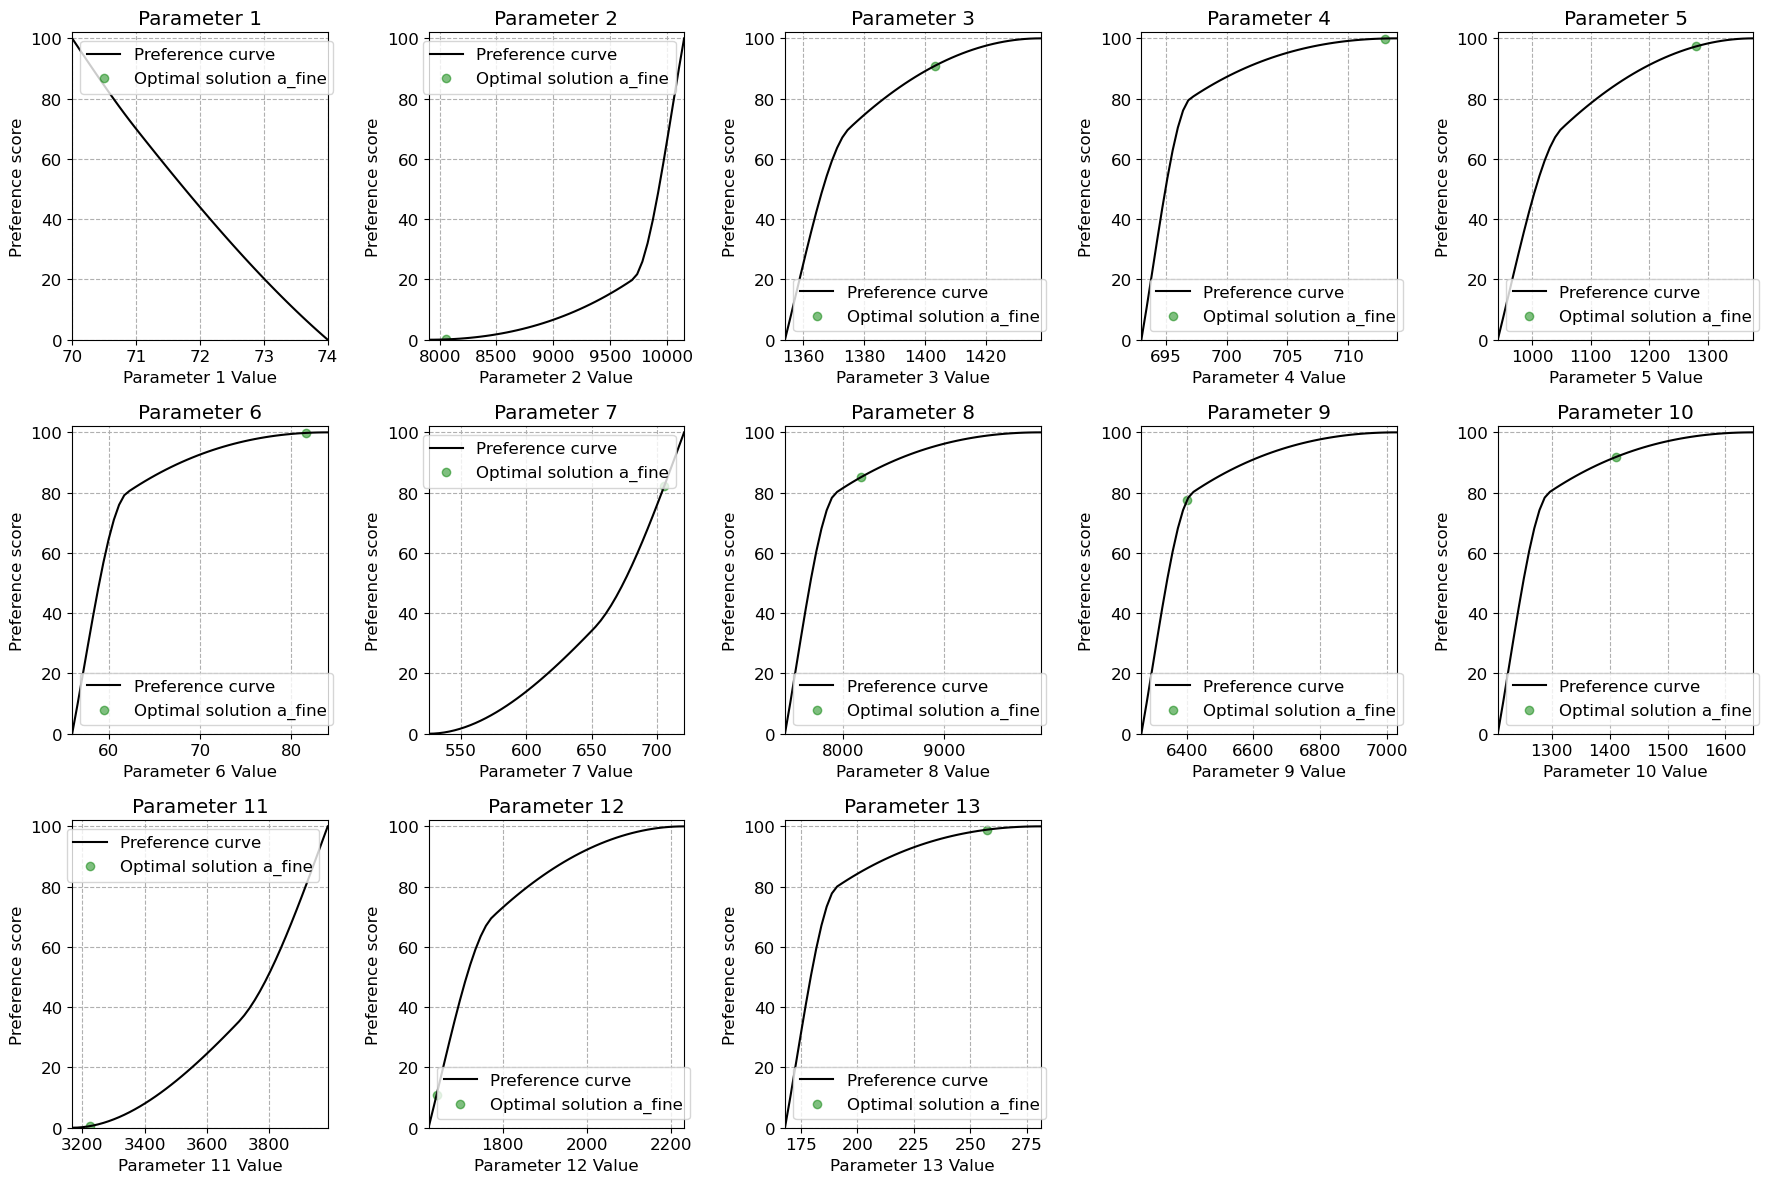

In [16]:
# We run the optimization with two paradigms
paradigm = ['minmax', 'a_fine']
marker = ['o', '*']
color = ['orange', 'green']

# Define the figure and axes before the loop
fig = plt.figure(figsize=(18, 12))

# Creating 13 subplots for the 13 preference scores
ax1 = fig.add_subplot(3, 5, 1)
ax2 = fig.add_subplot(3, 5, 2)
ax3 = fig.add_subplot(3, 5, 3)
ax4 = fig.add_subplot(3, 5, 4)
ax5 = fig.add_subplot(3, 5, 5)
ax6 = fig.add_subplot(3, 5, 6)
ax7 = fig.add_subplot(3, 5, 7)
ax8 = fig.add_subplot(3, 5, 8)
ax9 = fig.add_subplot(3, 5, 9)
ax10 = fig.add_subplot(3, 5, 10)
ax11 = fig.add_subplot(3, 5, 11)
ax12 = fig.add_subplot(3, 5, 12)
ax13 = fig.add_subplot(3, 5, 13)

for i in range(1, 2):
    # Make dictionary with parameter settings for the GA run with the IMAP solver
    options = {
        'n_bits': 24,
        'n_iter': 400,
        'n_pop': 500,
        'r_cross': 0.8,
        'max_stall': 16,
        'aggregation': paradigm[i],  # minmax or a_fine
        'var_type': 'real'
    }

    # Run the GA and print its result
    print(f'Run GA with IMAP')
    ga = GeneticAlgorithm(objective=objective, constraints=cons, bounds=bounds, options=options)
    score_IMAP, design_variables_IMAP, _ = ga.run()

    p1, p2, s1, p3, s2, p4, s3, p5, s4, p6, p7, s5 = design_variables_IMAP

    for n in range(12):
        print(f'Optimal result for x{str(n+1)} = {round(design_variables_IMAP[n]*100)}')
    
    investment = (2580 - 2950) * 14142 + 2950 * (p1 + p2 + p3 + p4 + p5 + p6 + p7) * 100 + 1400 * (s1 + s2 + s3 + s4 + s5) * 100
    print('investment = ' + str(investment))

    print('total primary location: ' + str((p1 + p2 + p3 + p4 + p5 + p6 + p7) * 100))
    print('total secondary location: ' + str((s1 + s2 + s3 + s4 + s5) * 100))

    """
    Now we have the results, we can make some figures. First, the resulting design variables are plotted into the solution 
    space. Secondly, we can plot the preference functions together with the results of the optimizations.
    """
    # Calculate individual preference scores for the results of the GA to plot them on the preference curves
    c1_res = (((2580 - 2950) * 14142 + 2950 * (p1 + p2 + p3 + p4 + p5 + p6 + p7) * 100 + 1400 * (s1 + s2 + s3 + s4 + s5) * 100) / 1000000)
    p1_res = pchip_interpolate([70, 71, 74], [100, 70, 0], c1_res)

    c2_res = design_variables_IMAP[0] * 100
    p2_res = pchip_interpolate([7901, 9703, 10154], [0, 20, 100], c2_res)

    c3_res = design_variables_IMAP[1] * 100
    p3_res = pchip_interpolate([1354, 1375, 1438], [0, 70, 100], c3_res)

    c4_res = design_variables_IMAP[2] * 100
    p4_res = pchip_interpolate([693, 697, 714], [0, 80, 100], c4_res)

    c5_res = design_variables_IMAP[3] * 100
    p5_res = pchip_interpolate([941, 1050, 1378], [0, 70, 100], c5_res)

    c6_res = design_variables_IMAP[4] * 100
    p6_res = pchip_interpolate([56, 62, 84], [0, 80, 100], c6_res)

    c7_res = design_variables_IMAP[5] * 100
    p7_res = pchip_interpolate([525, 652, 721], [0, 35, 100], c7_res)

    c8_res = design_variables_IMAP[6] * 100
    p8_res = pchip_interpolate([7423, 7930, 9960], [0, 80, 100], c8_res)

    c9_res = design_variables_IMAP[7] * 100
    p9_res = pchip_interpolate([6264, 6417, 7031], [0, 80, 100], c9_res)

    c10_res = design_variables_IMAP[8] * 100
    p10_res = pchip_interpolate([1207, 1295, 1648], [0, 80, 100], c10_res)

    c11_res = design_variables_IMAP[9] * 100
    p11_res = pchip_interpolate([3167, 3702, 3990], [0, 35, 100], c11_res)

    c12_res = design_variables_IMAP[10] * 100
    p12_res = pchip_interpolate([1624, 1776, 2230], [0, 70, 100], c12_res)

    c13_res = design_variables_IMAP[11] * 100
    p13_res = pchip_interpolate([168, 191, 281], [0, 80, 100], c13_res)

    # Plot the preference curves for the first iteration (i.e., i == 0) only
    if i == 1:
        # Create arrays for plotting continuous preference curves
        c1 = np.linspace(70, 74)
        c2 = np.linspace(7901, 10154)
        c3 = np.linspace(1354, 1438)
        c4 = np.linspace(693,714)
        c5 = np.linspace(941, 1378)
        c6 = np.linspace(56, 84)
        c7 = np.linspace(525, 721)
        c8 = np.linspace(7423,9960)
        c9 = np.linspace(6264, 7031)
        c10 = np.linspace(1207, 1648)
        c11 = np.linspace(3167, 3990)
        c12 = np.linspace(1624,2230)
        c13 = np.linspace(168,281)

        # Calculate the preference functions
        p1 = pchip_interpolate([70, 71, 74], [100, 70, 0], c1)
        p2 = pchip_interpolate([7901, 9703, 10154], [0, 20, 100], c2)
        p3 = pchip_interpolate([1354, 1375, 1438], [0, 70, 100], c3)
        p4 = pchip_interpolate([693, 697, 714], [0, 80, 100], c4)
        p5 = pchip_interpolate([941, 1050, 1378], [0, 70, 100], c5)
        p6 = pchip_interpolate([56, 62, 84], [0, 80, 100], c6)
        p7 = pchip_interpolate([525, 652, 721], [0, 35, 100], c7)
        p8 = pchip_interpolate([7423, 7930, 9960], [0, 80, 100], c8)
        p9 = pchip_interpolate([6264, 6417, 7031], [0, 80, 100], c9)
        p10 = pchip_interpolate([1207, 1295, 1648], [0, 80, 100], c10)
        p11 = pchip_interpolate([3167, 3702, 3990], [0, 35, 100], c11)
        p12 = pchip_interpolate([1624, 1776, 2230], [0, 70, 100], c12)
        p13 = pchip_interpolate([168, 191, 281], [0, 80, 100], c13)

        # Plot the preference curves
        ax1.plot(c1, p1, label='Preference curve', color='black')
        ax1.set_xlim((70, 74))
        ax1.set_ylim((0, 102))
        ax1.set_title('Parameter 1')
        ax1.set_xlabel('Parameter 1 Value')
        ax1.set_ylabel('Preference score')
        ax1.grid(linestyle='--')

        ax2.plot(c2, p2, label='Preference curve', color='black')
        ax2.set_xlim((7901, 10154))
        ax2.set_ylim((0, 102))
        ax2.set_title('Parameter 2')
        ax2.set_xlabel('Parameter 2 Value')
        ax2.set_ylabel('Preference score')
        ax2.grid(linestyle='--')

        ax3.plot(c3, p3, label='Preference curve', color='black')
        ax3.set_xlim((1354, 1438))
        ax3.set_ylim((0, 102))
        ax3.set_title('Parameter 3')
        ax3.set_xlabel('Parameter 3 Value')
        ax3.set_ylabel('Preference score')
        ax3.grid(linestyle='--')

        ax4.plot(c4, p4, label='Preference curve', color='black')
        ax4.set_xlim((693, 714))
        ax4.set_ylim((0, 102))
        ax4.set_title('Parameter 4')
        ax4.set_xlabel('Parameter 4 Value')
        ax4.set_ylabel('Preference score')
        ax4.grid(linestyle='--')

        ax5.plot(c5, p5, label='Preference curve', color='black')
        ax5.set_xlim((941, 1378))
        ax5.set_ylim((0, 102))
        ax5.set_title('Parameter 5')
        ax5.set_xlabel('Parameter 5 Value')
        ax5.set_ylabel('Preference score')
        ax5.grid(linestyle='--')

        ax6.plot(c6, p6, label='Preference curve', color='black')
        ax6.set_xlim((56, 84))
        ax6.set_ylim((0, 102))
        ax6.set_title('Parameter 6')
        ax6.set_xlabel('Parameter 6 Value')
        ax6.set_ylabel('Preference score')
        ax6.grid(linestyle='--')

        ax7.plot(c7, p7, label='Preference curve', color='black')
        ax7.set_xlim((525, 721))
        ax7.set_ylim((0, 102))
        ax7.set_title('Parameter 7')
        ax7.set_xlabel('Parameter 7 Value')
        ax7.set_ylabel('Preference score')
        ax7.grid(linestyle='--')

        ax8.plot(c8, p8, label='Preference curve', color='black')
        ax8.set_xlim((7423, 9960))
        ax8.set_ylim((0, 102))
        ax8.set_title('Parameter 8')
        ax8.set_xlabel('Parameter 8 Value')
        ax8.set_ylabel('Preference score')
        ax8.grid(linestyle='--')

        ax9.plot(c9, p9, label='Preference curve', color='black')
        ax9.set_xlim((6264, 7031))
        ax9.set_ylim((0, 102))
        ax9.set_title('Parameter 9')
        ax9.set_xlabel('Parameter 9 Value')
        ax9.set_ylabel('Preference score')
        ax9.grid(linestyle='--')

        ax10.plot(c10, p10, label='Preference curve', color='black')
        ax10.set_xlim((1207, 1648))
        ax10.set_ylim((0, 102))
        ax10.set_title('Parameter 10')
        ax10.set_xlabel('Parameter 10 Value')
        ax10.set_ylabel('Preference score')
        ax10.grid(linestyle='--')

        ax11.plot(c11, p11, label='Preference curve', color='black')
        ax11.set_xlim((3167, 3990))
        ax11.set_ylim((0, 102))
        ax11.set_title('Parameter 11')
        ax11.set_xlabel('Parameter 11 Value')
        ax11.set_ylabel('Preference score')
        ax11.grid(linestyle='--')

        ax12.plot(c12, p12, label='Preference curve', color='black')
        ax12.set_xlim((1624, 2230))
        ax12.set_ylim((0, 102))
        ax12.set_title('Parameter 12')
        ax12.set_xlabel('Parameter 12 Value')
        ax12.set_ylabel('Preference score')
        ax12.grid(linestyle='--')

        ax13.plot(c13, p13, label='Preference curve', color='black')
        ax13.set_xlim((168, 281))
        ax13.set_ylim((0, 102))
        ax13.set_title('Parameter 13')
        ax13.set_xlabel('Parameter 13 Value')
        ax13.set_ylabel('Preference score')
        ax13.grid(linestyle='--')

    # Scatter plot for the optimal solutions
    ax1.scatter(c1_res, p1_res, label=f'Optimal solution {paradigm[i]}', color=color[i], alpha=0.5)
    ax2.scatter(c2_res, p2_res, label=f'Optimal solution {paradigm[i]}', color=color[i], alpha=0.5)
    ax3.scatter(c3_res, p3_res, label=f'Optimal solution {paradigm[i]}', color=color[i], alpha=0.5)
    ax4.scatter(c4_res, p4_res, label=f'Optimal solution {paradigm[i]}', color=color[i], alpha=0.5)
    ax5.scatter(c5_res, p5_res, label=f'Optimal solution {paradigm[i]}', color=color[i], alpha=0.5)
    ax6.scatter(c6_res, p6_res, label=f'Optimal solution {paradigm[i]}', color=color[i], alpha=0.5)
    ax7.scatter(c7_res, p7_res, label=f'Optimal solution {paradigm[i]}', color=color[i], alpha=0.5)
    ax8.scatter(c8_res, p8_res, label=f'Optimal solution {paradigm[i]}', color=color[i], alpha=0.5)
    ax9.scatter(c9_res, p9_res, label=f'Optimal solution {paradigm[i]}', color=color[i], alpha=0.5)
    ax10.scatter(c10_res, p10_res, label=f'Optimal solution {paradigm[i]}', color=color[i], alpha=0.5)
    ax11.scatter(c11_res, p11_res, label=f'Optimal solution {paradigm[i]}', color=color[i], alpha=0.5)
    ax12.scatter(c12_res, p12_res, label=f'Optimal solution {paradigm[i]}', color=color[i], alpha=0.5)
    ax13.scatter(c13_res, p13_res, label=f'Optimal solution {paradigm[i]}', color=color[i], alpha=0.5)

# Add legends and improve layout
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
ax6.legend()
ax7.legend()
ax8.legend()
ax9.legend()
ax10.legend()
ax11.legend()
ax12.legend()
ax13.legend()

# Adjust the layout
fig.tight_layout()

# Display the plot
plt.show()